In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import os

# Libraries for Plotting

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Data Preprocessing

from sklearn import preprocessing

# Importing Libraries for Time Series Analysis

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

# Library for copying

import copy

In [3]:
# Identifying current directory

current_directory = os.getcwd()
print(current_directory)

/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/Notebooks


In [4]:
# Changing current directory to the path consisting Datasets

os.chdir("/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/Notebooks/Data")

In [5]:
# Importing the previously prepared OECD-FAO dataset

df = pd.read_csv('Prepared_Data.csv')
df.drop('Unnamed: 0', axis = 1, inplace= True) ## Dropping Column with index as column
df.head()

,Year,Pork,Beef_and_veal,Poultry,Sheep,Population
0,1990,21638.20,12415.74,2054.65,1809.26,448805.382
1,1991,21234.93,12311.40,8099.46,1753.56,450298.107
2,1992,20991.89,15833.92,9777.32,2051.71,688358.946
3,1993,24072.31,15307.84,9799.41,2070.24,705070.033
4,1994,23715.50,14543.26,10474.86,1981.30,705611.100


In [6]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y').dt.strftime('%Y') ## Changing Year to datetime type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           32 non-null     object 
 1   Pork           32 non-null     float64
 2   Beef_and_veal  32 non-null     float64
 3   Poultry        32 non-null     float64
 4   Sheep          32 non-null     float64
 5   Population     32 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.6+ KB


In [7]:
df

,Year,Pork,Beef_and_veal,Poultry,Sheep,Population
0,1990,21638.20,12415.74,2054.65,1809.26,448805.382
1,1991,21234.93,12311.40,8099.46,1753.56,450298.107
2,1992,20991.89,15833.92,9777.32,2051.71,688358.946
3,1993,24072.31,15307.84,9799.41,2070.24,705070.033
4,1994,23715.50,14543.26,10474.86,1981.30,705611.100
5,1995,23678.54,13615.01,11014.16,1940.39,705768.653
6,1996,23315.00,13149.18,11370.33,1894.99,705842.588
7,1997,23128.11,12873.88,11832.93,1797.43,705880.858
8,1998,24218.65,12574.53,12144.54,1786.36,705845.172
9,1999,24154.35,11856.89,11998.97,1759.31,705683.958


In [8]:
# Data Description

df.describe()

,Pork,Beef_and_veal,Poultry,Sheep,Population
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,24896.147187,12117.775312,14741.579063,1611.744375,707232.594688
std,1597.993835,1276.612815,4344.062360,236.751343,69331.297805
min,20991.890000,10560.190000,2054.650000,1292.330000,448805.382000
25%,24079.937500,11031.852500,11808.165000,1366.575000,705844.526000
50%,25245.100000,11991.015000,14896.010000,1636.165000,723054.896000
75%,26082.580000,12422.722500,18063.000000,1767.475000,738151.155000
max,27007.080000,15833.920000,20660.750000,2070.240000,744227.517000


In [9]:
# Changing current directory to the path consisting Notebooks

os.chdir("/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/Notebooks")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


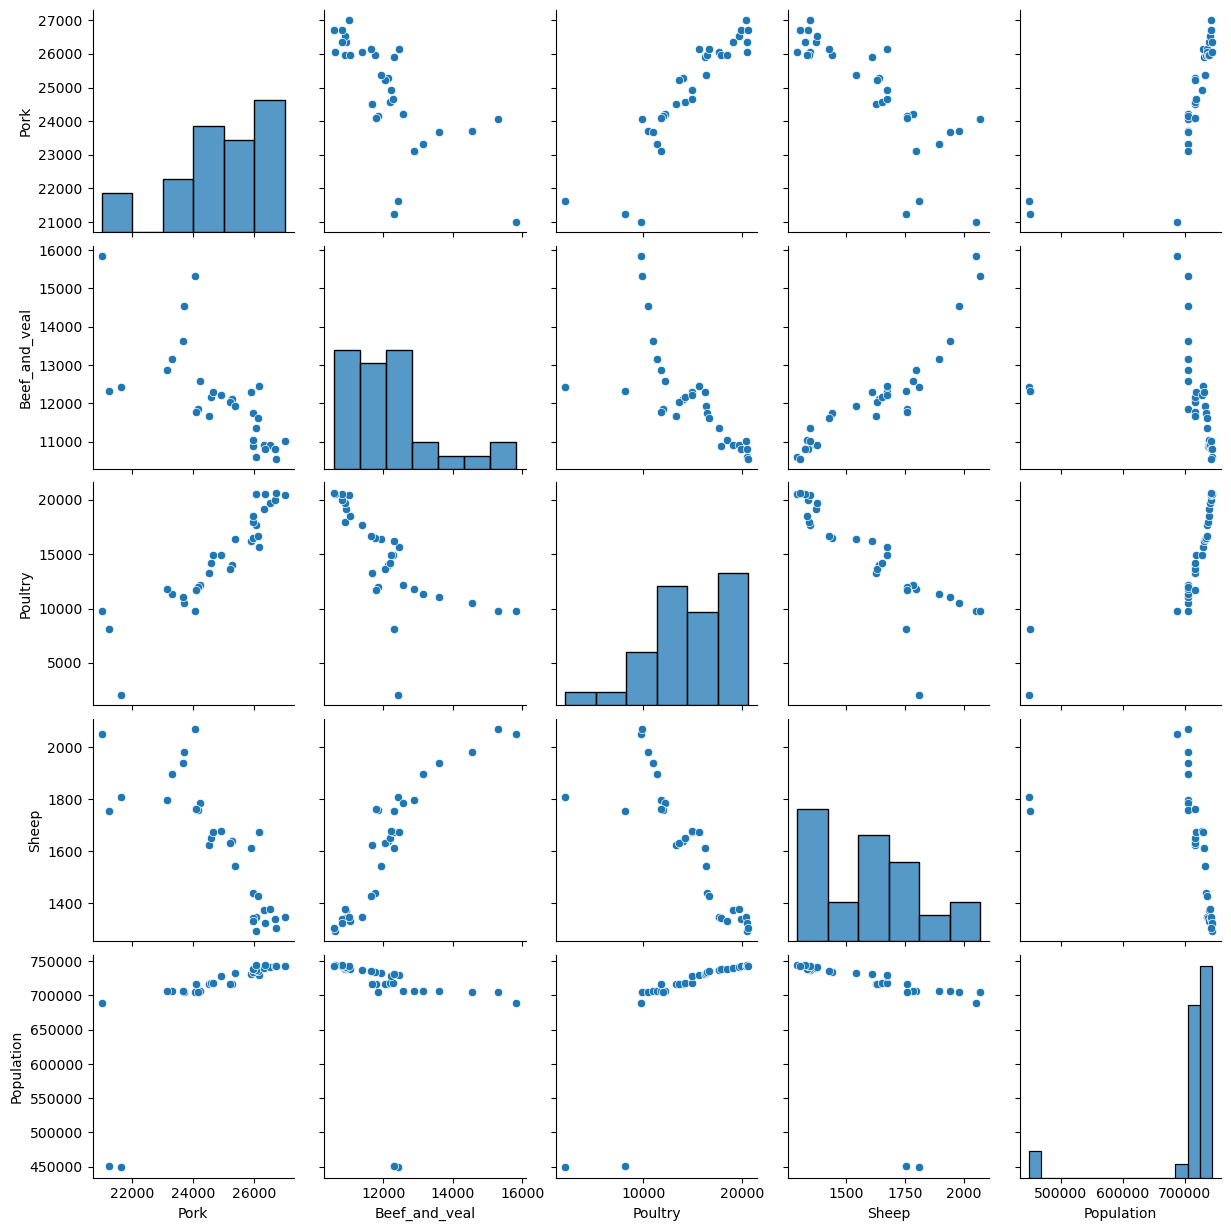

In [10]:
# Plotting Correlation Pair-Plots for every meat consumption type and population, including individual distributions

sns.pairplot(df, diag_kind= "hist")
plt.savefig('Figures/OECDFAOpairplot.eps', dpi=300)
plt.show()

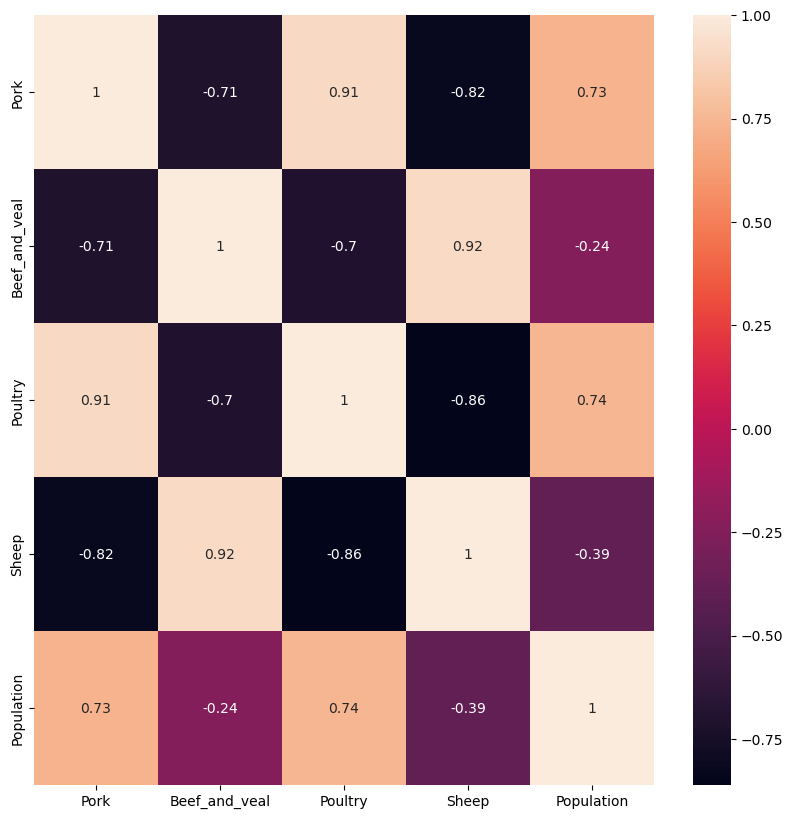

In [11]:
# Correlation Heatmap showing relationship between different meat consumption types and population

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.savefig('Figures/oecdfaoheatmap.eps', dpi=300)
plt.show()

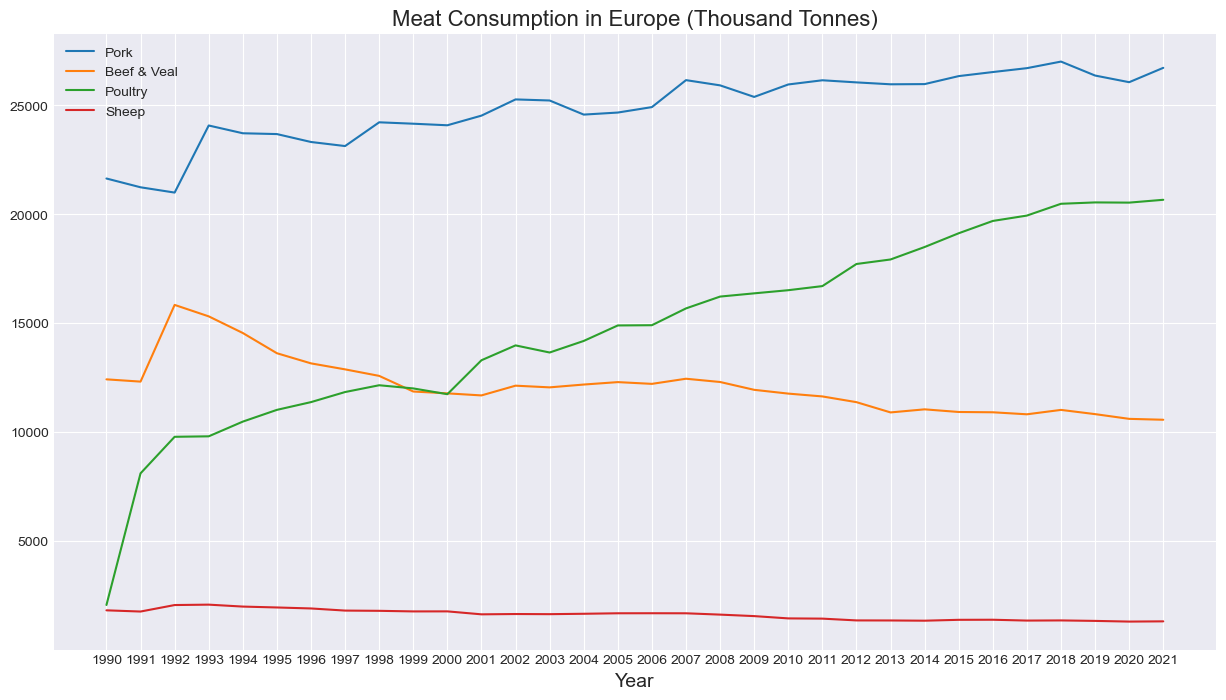

In [12]:
# Plot showing different consumption volumes over the span of 31 years

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (15, 8))
plt.xlabel('Year', fontsize = 14)

plt.plot(df['Year'], df['Pork'], label = 'Pork')
plt.plot(df['Year'], df['Beef_and_veal'], label = 'Beef & Veal')
plt.plot(df['Year'], df['Poultry'], label = 'Poultry')
plt.plot(df['Year'], df['Sheep'], label = 'Sheep')


plt.title('Meat Consumption in Europe (Thousand Tonnes)', fontsize = 16)
plt.savefig('Figures/oecdfaots.eps', dpi = 300)
plt.legend() 
plt.show()  

In [13]:
df1 = copy.deepcopy(df)
df1.set_index('Year', inplace = True)
df1.head()

,Pork,Beef_and_veal,Poultry,Sheep,Population
Year,,,,,
1990,21638.20,12415.74,2054.65,1809.26,448805.382
1991,21234.93,12311.40,8099.46,1753.56,450298.107
1992,20991.89,15833.92,9777.32,2051.71,688358.946
1993,24072.31,15307.84,9799.41,2070.24,705070.033
1994,23715.50,14543.26,10474.86,1981.30,705611.100


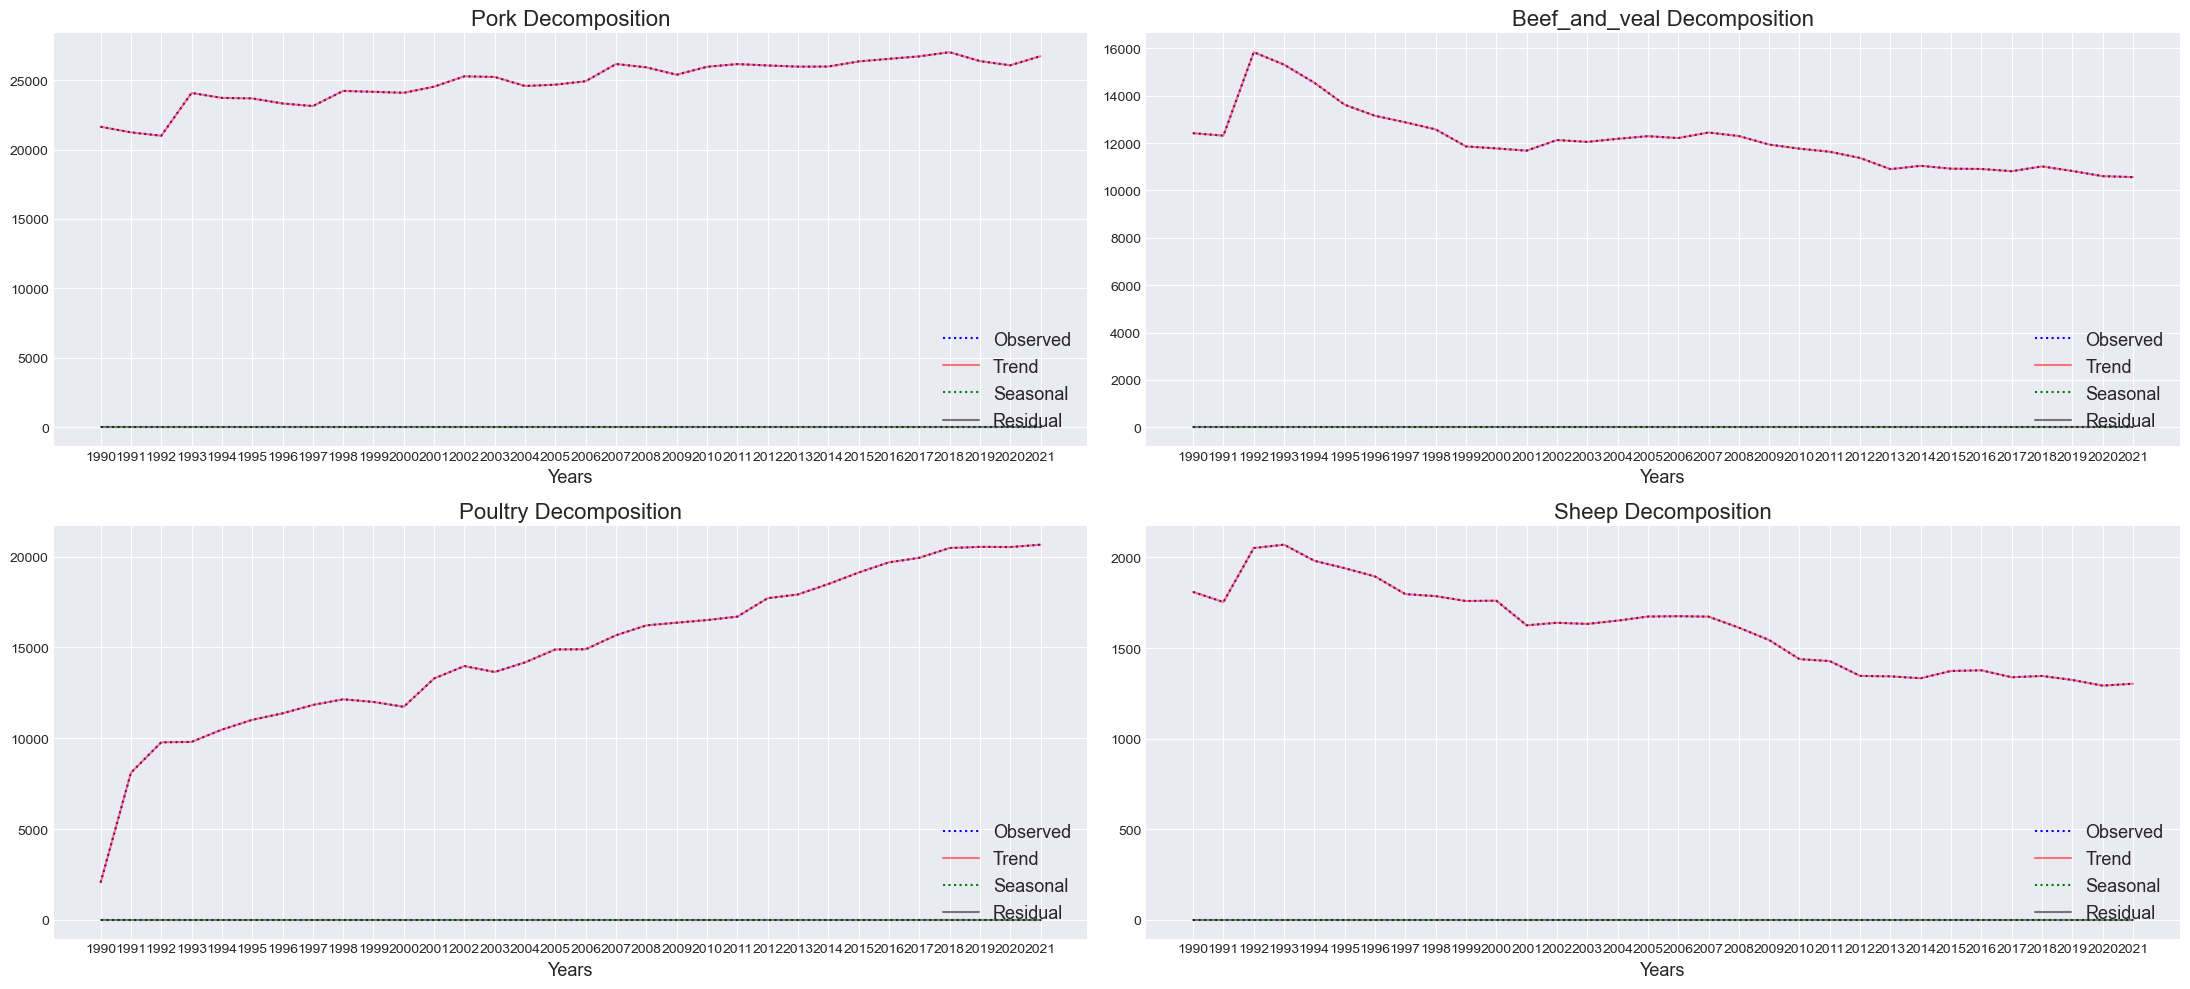

In [14]:
# Time Series Decompositions for each meat consumption type


l1 = ['Pork', 'Beef_and_veal', 'Poultry', 'Sheep']

# Define the number of rows and columns for subplots
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 10))

for i, col in enumerate(l1):
    decomposition = sm.tsa.seasonal_decompose(df1[col], model='additive', period = 1)
    
    ax = axes[i // ncols, i % ncols]

    # Plot original series
    ax.plot(decomposition.observed, label='Observed', color='blue', linestyle = ':')
    
    # Plot trend component
    ax.plot(decomposition.trend.index, decomposition.trend, label='Trend', color='red', alpha = 0.5)
    
    # Plot seasonal component
    ax.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal', color='green', linestyle = ':')
    
    # Plot residual component
    ax.plot(decomposition.resid.index, decomposition.resid, label='Residual', color='black', alpha = 0.5)
    
    ax.set_title(col + ' Decomposition', fontsize=16)
    ax.legend(loc='lower right', fontsize=13)
    ax.set_xlabel('Years', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig("Figures/TSDecomposition.svg")
plt.show()


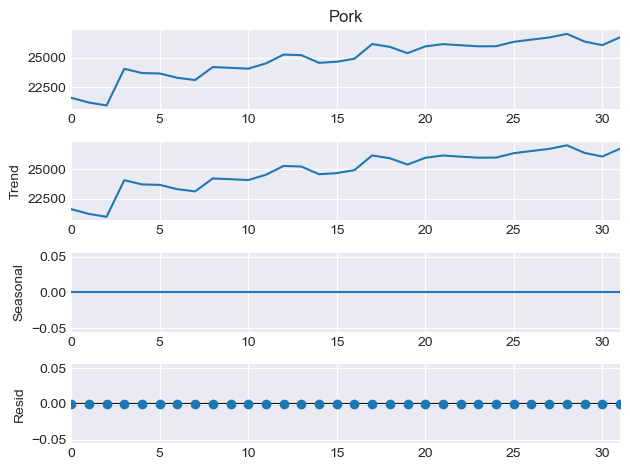

In [15]:
pork_dec = sm.tsa.seasonal_decompose(df['Pork'], model = 'additive', period = 1) # Decompose using Additive Model
pork_dec.plot()
plt.savefig('Figures/oecdfaoPork.eps', dpi = 300)
#plt.title('Additive Decompose')
plt.show()

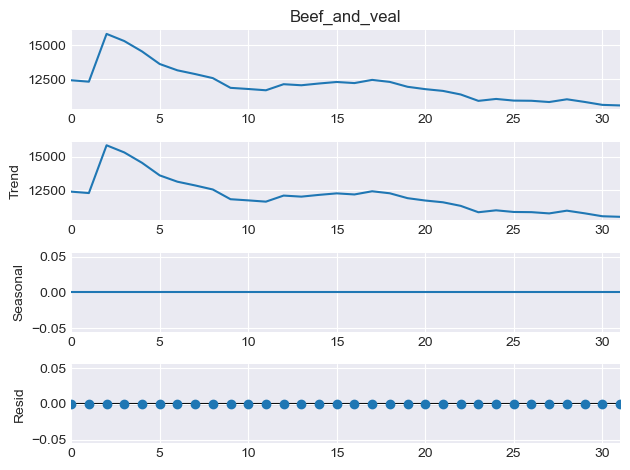

In [16]:
beef_dec = sm.tsa.seasonal_decompose(df['Beef_and_veal'], model = 'additive', period = 1) # Decompose using Additive Model
beef_dec.plot()
plt.savefig('Figures/oecdfaobv.eps', dpi = 300)
#plt.title('Additive Decompose')
plt.show()

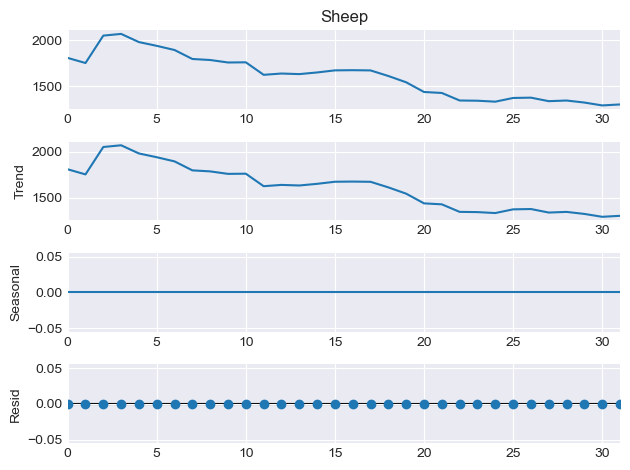

In [17]:
sheep_dec = sm.tsa.seasonal_decompose(df['Sheep'], model = 'additive', period = 1) # Decompose using Additive Model
sheep_dec.plot()
plt.savefig('Figures/oecdfaosheep.eps', dpi = 300)
#plt.title('Additive Decompose')
plt.show()

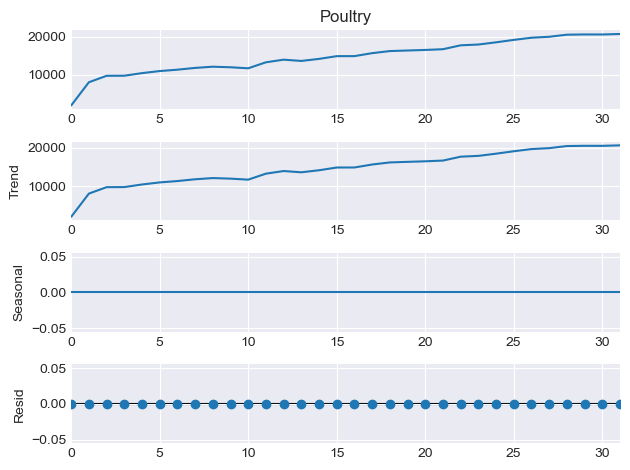

In [18]:
poultry_dec = sm.tsa.seasonal_decompose(df['Poultry'], model = 'additive', period = 1) # Decompose using Additive Model
poultry_dec.plot()
plt.savefig('Figures/oecdfaopoultry.eps', dpi = 300)
#plt.title('Additive Decompose')
plt.show()

### ADF test is conducted with the following assumptions:

Null Hypothesis (H0): Series is non-stationary, or series has a unit root.

Alternate Hypothesis(H1): Series is stationary, or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

Conditions to Reject Null Hypothesis(H0)

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(H0), i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [19]:
def run_adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

In [20]:
def tsplot(y, series_name = None, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        # ts_ax.set_xlabel('Years')  # Adding x label
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        acf_ax.set_xlabel('Lags')  # Adding x label to ACF plot
        acf_ax.set_ylabel('ACF') 
        smt.graphics.plot_pacf(y, lags = 5, ax=pacf_ax, method='ywm')
        pacf_ax.set_xlabel('Lags')  # Adding x label to PACF plot
        pacf_ax.set_ylabel('Partial ACF')
        plt.savefig(f"Figures/TS_Analysis_{series_name}.svg")
        plt.tight_layout()
        plt.show()

In [21]:
df.set_index('Year', inplace=True)

Results of Dickey-Fuller Test:
Test Statistic                 -4.422764
p-value                         0.000270
#Lags Used                      8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


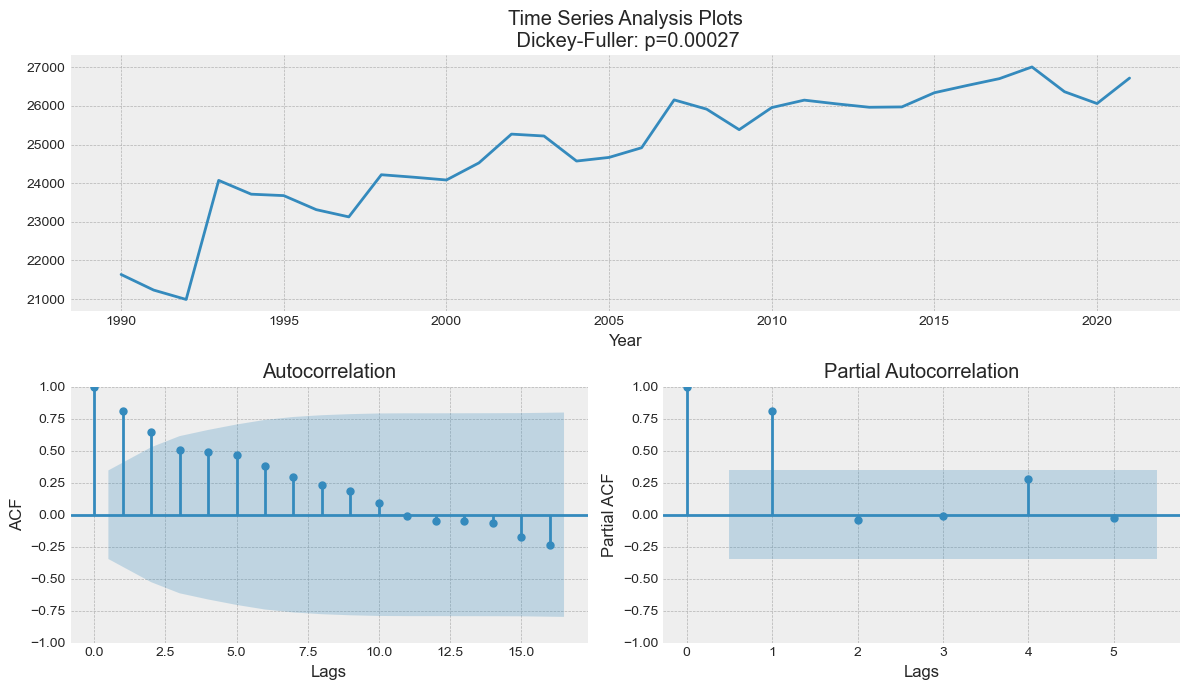

In [22]:
## ADF Test and Time Series Plots for Pork

run_adf_test(df['Pork'])
tsplot(df['Pork'], series_name="Pork")

ADF test gives p-value as 0.000270, i.e., <0.05 which means, we reject the null hypothesis stating that the series is non-stationary. The test statistic < Critical Values. Thus, Time Series for Pork is stationary. 

Results of Dickey-Fuller Test:
Test Statistic                  0.739439
p-value                         0.990593
#Lags Used                      9.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


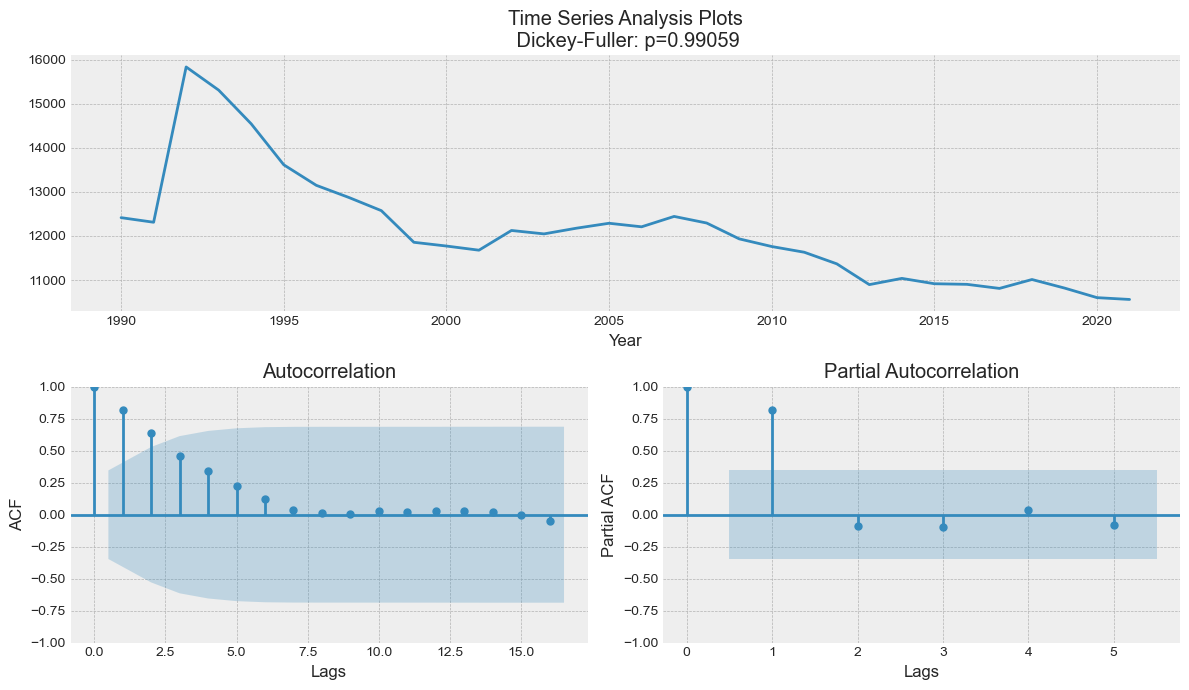

In [23]:
## ADF Test and Time Series Plots for Beef and Veal

run_adf_test(df['Beef_and_veal'])
tsplot(df['Beef_and_veal'], series_name="BeefandVeal")

ADF test gives p-value as 0.990593, i.e., >0.05 which means, we accept the null hypothesis stating that the series is non-stationary. The test statistic > Critical Values. Thus, Time Series for Beef and Veal is non-stationary. 

Results of Dickey-Fuller Test:
Test Statistic                 -1.079203
p-value                         0.723294
#Lags Used                      2.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


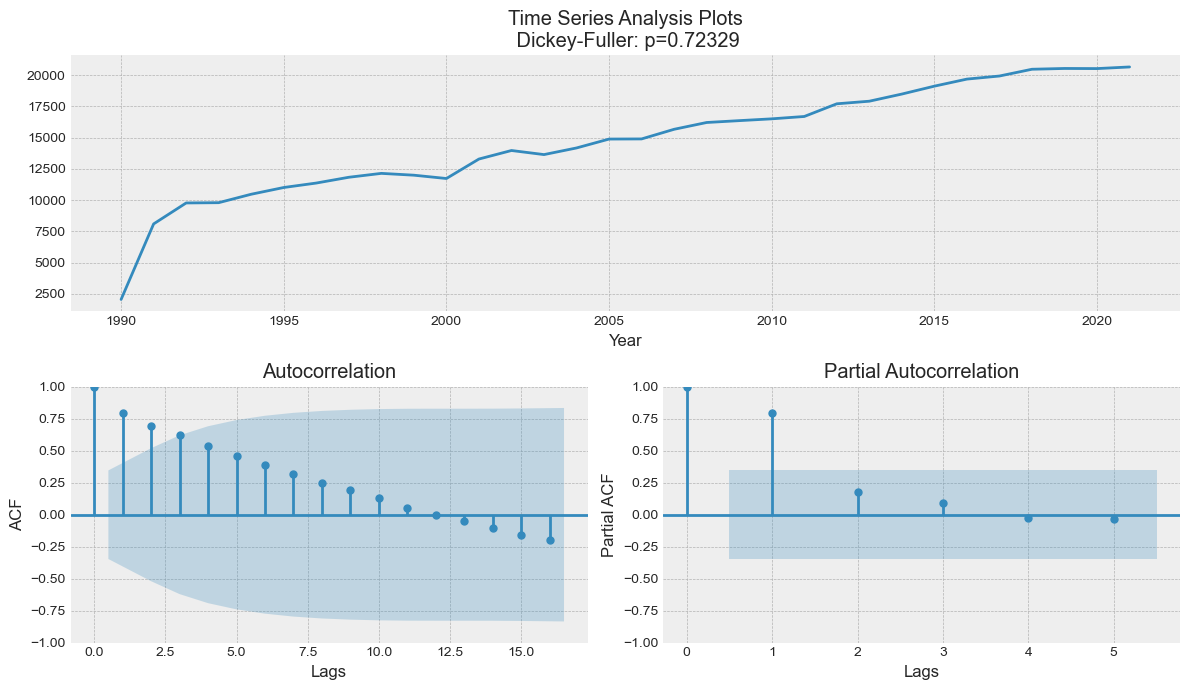

In [24]:
## ADF Test and Time Series Plots for Poultry

run_adf_test(df['Poultry'])
tsplot(df['Poultry'], series_name="Poultry")

ADF test gives p-value as 0.723294, i.e., >0.05 which means, we accept the null hypothesis stating that the series is non-stationary. The test statistic > Critical Values. Thus, Time Series for Poultry is non-stationary. 

Results of Dickey-Fuller Test:
Test Statistic                 -0.782466
p-value                         0.824218
#Lags Used                      9.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


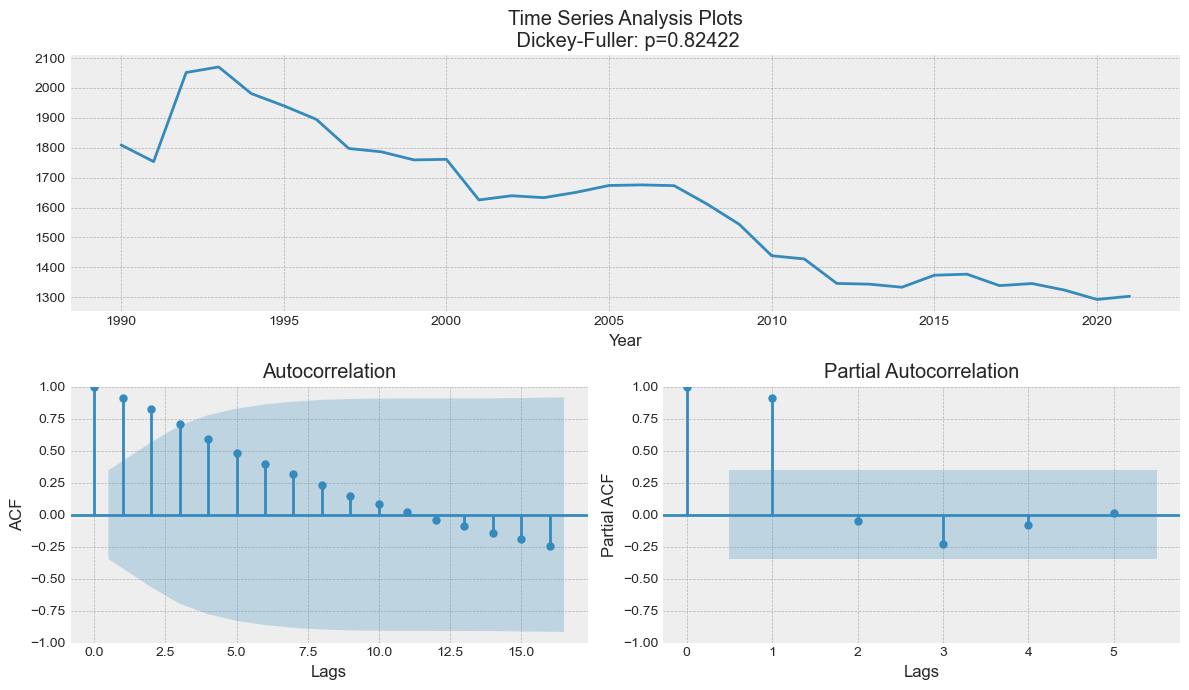

In [25]:
## ADF Test and Time Series Plots for Sheep

run_adf_test(df['Sheep'])
tsplot(df['Sheep'], series_name="Sheep")

ADF test gives p-value as 0.824218, i.e., >0.05 which means, we accept the null hypothesis stating that the series is non-stationary. The test statistic > Critical Values. Thus, Time Series for Sheep is non-stationary. 

In [28]:
# Determine d (Order of Differencing)

def determine_d(ts):
    d = 0
    p_value = 1
    while p_value > 0.05:
        adf_test = adfuller(ts)
        p_value = adf_test[1]
        if p_value > 0.05:
            ts = ts.diff().dropna()
            d += 1
    return d

d_pork = determine_d(df['Pork'])
d_bv = determine_d(df['Beef_and_veal'])
d_poultry = determine_d(df['Poultry'])
d_sheep = determine_d(df['Sheep'])

print(d_pork, d_bv, d_poultry, d_sheep)

0 1 1 1


Thus, to make the Time Series stationary, the order of differencing for Beef and Veal, Poultry and Sheep are identified as 1.